### In this file I'm going to analyze all the data I have using: "Pandas", "Matplotlib", "Math", "NumPy" and "DateTime"
#### Unfortunately, dataset is not representetive in some cases, as I only have data for 3 days(1 weekday(Friday) and 2 weekends). Moreover, my data starts at 15:40 on Friday and ends at 14:20 on Sunday, which means that i don't have the first 16 hours of Friday and the last 10 hours of Sunday(26 hours in total, which is more than a whole day)

In [170]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
from datetime import datetime
plt.style.use('seaborn-v0_8-pastel')

In [185]:
df = pd.read_csv('Only_my_station.csv')


#In my dataset, the date and time were in the same column and because of this,
#I couldn't analyze them, so I decided to unsplit them into different columns using built-in "DateTime" module
#Additionaly i converte them from String type to the DateTime
df['start date'] = list(datetime.strptime(df['starttime'][x][0:10], '%d/%m/%Y') for x in range(df.shape[0]))
df['start hour'] = list(datetime.strptime(df['starttime'][x][11:], "%H:%M") for x in range(df.shape[0]))

df['stop date'] = list(datetime.strptime(df['stoptime'][x][0:10], '%d/%m/%Y') for x in range(df.shape[0]))
df["stop hour"] = list(datetime.strptime(df['stoptime'][x][11:], "%H:%M")for x in range(df.shape[0]))

df.drop(columns=['Unnamed: 0', 'starttime', "stoptime"], inplace=True)#Dropped the old columns that are useless
df = df[['tripduration', 'start date', 'start hour', 'stop date', 'stop hour','start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'usertype', 'birth year', 'gender']]
#Changed the column order

In [186]:
df['tripduration'] = list(x/3600 for x in df['tripduration'])
df['tripduration'].mean()

0.2901103395061728

As we can see, the average trip duration is about 20 minutes(because time is given in the system from 0 to 1, 0.3 its 1/3 and for 1 hour it's 20 minutes).
This means that customers don't use bicycles for long distance trip, as the average speed of a beginner cyclist is 15-20 kmph, so people use them for trips of 4.5-6 km

In [102]:
df['gender'] = df['gender'].replace({1, 2, 0}, {'Male', 'Female', "Unrecognised"})

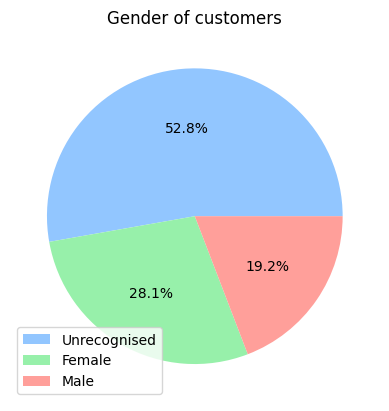

In [103]:
genders = ['Unrecognised', 'Female', 'Male']
genders_c = list(df.value_counts(df['gender']))
plt.pie(genders_c, autopct = '%1.1f%%')
plt.title('Gender of customers')
plt.legend(genders, loc='lower left')

The biggest part of customers(52.8%) didn't share their genders, which means they don't want to be analyzied and/or personalized. On the other hand, 28.1% of customers was women and 19.2% men. Thus, it can be concluded that more women than men use bycicle rental. This means that women prefered spending time outdoor with a bicycle  more than men.

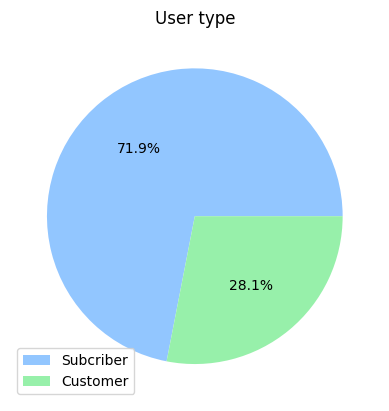

In [104]:
usertype = ['Subcriber', 'Customer']
usertype_c = list(df.value_counts(df['usertype']))
plt.pie(usertype_c,autopct = '%1.1f%%')
plt.title('User type')
plt.legend(usertype, loc='lower left')

As we can see, 71.9% of those who used bike sharing service are Subscribers. This means that people use they very offten, which means that bike sharing is popular, well-organized, and developed

In [187]:
N = df.shape[0]
k = round(math.sqrt(N))#Counting bins using a statistical formula

(array([154., 113.,  66.,  12.,   6.,   1.,   3.,   0.,   1.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.03888889, 0.20226608, 0.36564327, 0.52902047, 0.69239766,
        0.85577485, 1.01915205, 1.18252924, 1.34590643, 1.50928363,
        1.67266082, 1.83603801, 1.9994152 , 2.1627924 , 2.32616959,
        2.48954678, 2.65292398, 2.81630117, 2.97967836, 3.14305556]),
 <BarContainer object of 19 artists>)

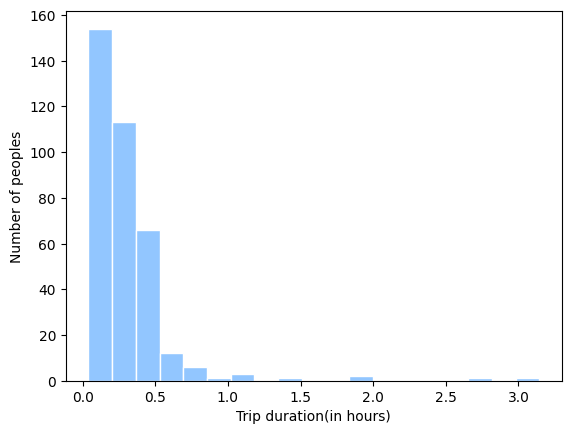

In [188]:
plt.ylabel('Number of peoples')
plt.xlabel('Trip duration(in hours)')
plt.hist(df['tripduration'], bins=k, edgecolor='w')

As we can see from the graph, the majority of trips lasted up to 30 minutes, which reinforces my conclusion about distance. But there are also people who used the bikes for more than an hour, even 2 and 3 hours. Most likely, these people used them for recreational cycling. and for most of the trips, they were probably for specific purposes, like getting home from work or going to the store, because Manhattan is a very big area.

In [107]:
#Converte 'bithyear datatype to numeric, becauese I need this for analysis
df['birth year'] = pd.to_numeric(df['birth year'], errors='coerce')
ages = []
#We have 'birth year' in data, but we needed age for the analysis, so the following lines do that
for i in range(df.shape[0]):
    if type(df['birth year'][i]) is not str:
        ages.append(2023 - df['birth year'][i])
    else:
        ages.append(df['birth year'][i])

N = df.shape[0]
k = round(math.sqrt(N))#Counting bins using a statistical formula

(array([ 1.,  5., 19., 34., 25., 25., 19., 35., 16., 14., 23., 18.,  5.,
        11.,  4.,  1.,  3.,  0.,  1.]),
 array([27.        , 29.78947368, 32.57894737, 35.36842105, 38.15789474,
        40.94736842, 43.73684211, 46.52631579, 49.31578947, 52.10526316,
        54.89473684, 57.68421053, 60.47368421, 63.26315789, 66.05263158,
        68.84210526, 71.63157895, 74.42105263, 77.21052632, 80.        ]),
 <BarContainer object of 19 artists>)

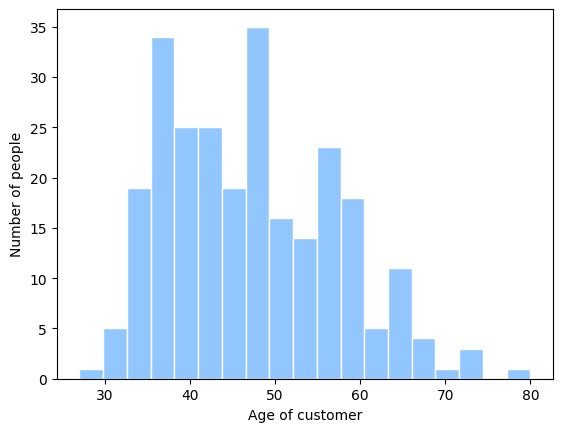

In [108]:
plt.ylabel('Number of people')
plt.xlabel('Age of customer')
plt.hist(ages, bins=k, edgecolor='w')

In [109]:
#To sort data by day, I need to convert data to the datetime type
friday = datetime.strptime('19/07/2013', '%d/%m/%Y')
saturday = datetime.strptime('20/07/2013', '%d/%m/%Y')
sunday = datetime.strptime('21/07/2013', '%d/%m/%Y')

In [167]:
#We need to define a fuction which sorts our date by days of the week
def sort_dw(day, llst):
    for i in range(df.shape[0]):
        if df['start date'][i] == day:
            p = pd.Series(list(df.iloc[i]), index=llst.columns)
            llst.loc[llst.shape[0]] = p
    return llst.astype(df.dtypes)

In [ ]:
df_friday = sort_dw(friday, pd.DataFrame(columns=df.columns))
df_saturday = sort_dw(saturday, pd.DataFrame(columns=df.columns))
df_sunday = sort_dw(sunday, pd.DataFrame(columns=df.columns))

In [189]:
weekends = list(df_saturday['tripduration']) + list(df_sunday['tripduration'])
avg_weekdays = df_friday['tripduration'].mean()
avg_weekends = np.average(weekends)
count_weekdays = df_friday.shape[0]
count_weekend = len(weekends)

Text(0.5, 1.0, 'Number of trips by part of the week')

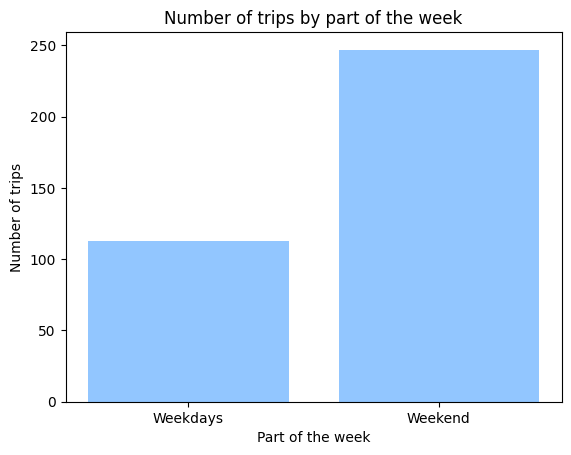

In [190]:
plt.bar(['Weekdays', 'Weekend'], [count_weekdays, count_weekend])
plt.xlabel('Part of the week')
plt.ylabel('Number of trips')
plt.title('Number of trips by part of the week')

Text(0.5, 1.0, 'Average trip time by part of the week')

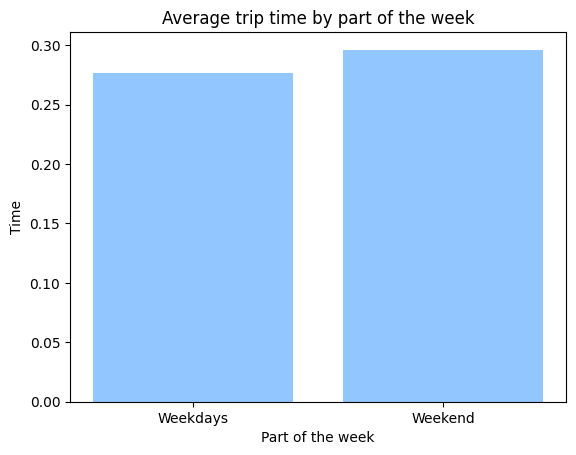

In [114]:
plt.bar(['Weekdays', 'Weekend'], [avg_weekdays, avg_weekends])
plt.xlabel('Part of the week')
plt.ylabel('Time')
plt.title('Average trip time by part of the week')

In [115]:
#This function calculates average trip duration and thei number in defferent parts of the day
def avg_tripduration(llst):
    #Defining some variables for function
    first_h = datetime.strptime('12:00', '%H:%M')
    second_h = datetime.strptime('18:00', '%H:%M')
    third_h = datetime.strptime('23:59', '%H:%M')
    forth_h = datetime.strptime('00:00', '%H:%M')
    fifth_h = datetime.strptime('6:00', '%H:%M')

    morning = []
    midday = []
    evening = []
    night = []

    #Runs a for loop that sorts data by parts of the input day
    for i in range(llst.shape[0]):
        if llst['start hour'][i] >= first_h and llst['start hour'][i] <= second_h:
            midday.append(llst.iloc[i]['tripduration'])
        elif llst['start hour'][i] > second_h and llst['start hour'][i] <= third_h:
            evening.append(llst.iloc[i]['tripduration'])
        elif llst['start hour'][i] >= forth_h and llst['start hour'][i] <= fifth_h:
            night.append(llst.iloc[i]['tripduration'])
        else:
            morning.append(llst.iloc[i]['tripduration'])

    avg_morning = np.average(morning)
    avg_midday = np.average(midday)
    avg_evening = np.average(evening)
    avg_night = np.average(night)

    return [[avg_night, avg_morning, avg_midday, avg_evening], [len(night), len(morning), len(midday), len(evening)]]

Text(0.5, 1.0, 'Number of trips by part of day')

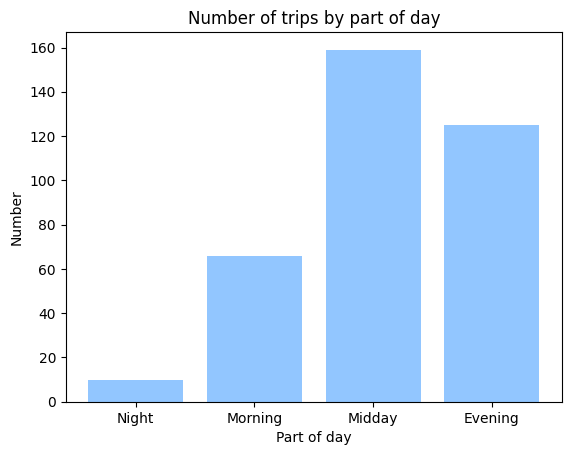

In [116]:
plt.bar(['Night', 'Morning', 'Midday', 'Evening'], avg_tripduration(df)[1])
plt.xlabel('Part of day')
plt.ylabel('Number')
plt.title('Number of trips by part of day')

Text(0.5, 1.0, 'Average trip time by part of day')

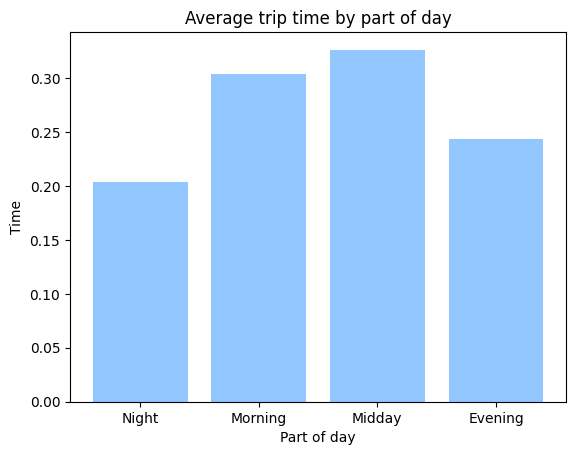

In [117]:
plt.bar(['Night', 'Morning', 'Midday', 'Evening'], avg_tripduration(df)[0])
plt.xlabel('Part of day')
plt.ylabel('Time')
plt.title('Average trip time by part of day')

Text(0.5, 1.0, 'Number of trips by different days of the week')

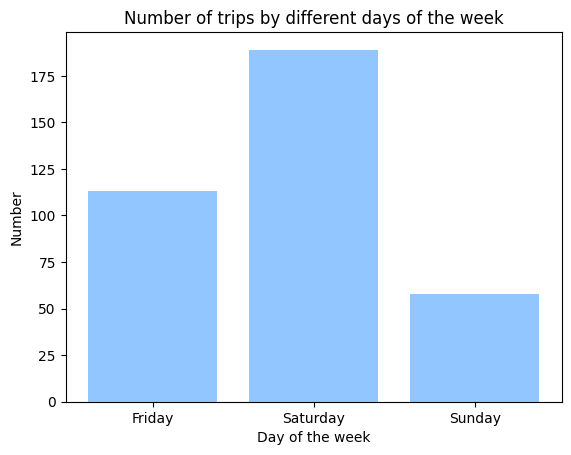

In [118]:
plt.bar(['Friday', 'Saturday', 'Sunday'], [df_friday.shape[0], df_saturday.shape[0], df_sunday.shape[0]])
plt.xlabel('Day of the week')
plt.ylabel('Number')
plt.title('Number of trips by different days of the week')

Text(0.5, 1.0, 'Average trip duration by different days of the week')

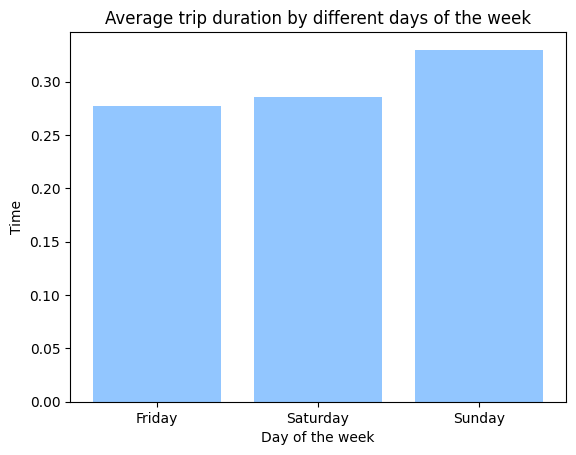

In [192]:
plt.bar(['Friday', 'Saturday', 'Sunday'], [df_friday['tripduration'].mean(),df_saturday['tripduration'].mean(),df_sunday['tripduration'].mean()])
plt.xlabel('Day of the week')
plt.ylabel('Time')
plt.title('Average trip duration by different days of the week')

c:\Users\kumak\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\kumak\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Average trip duration by part of day at Friday')

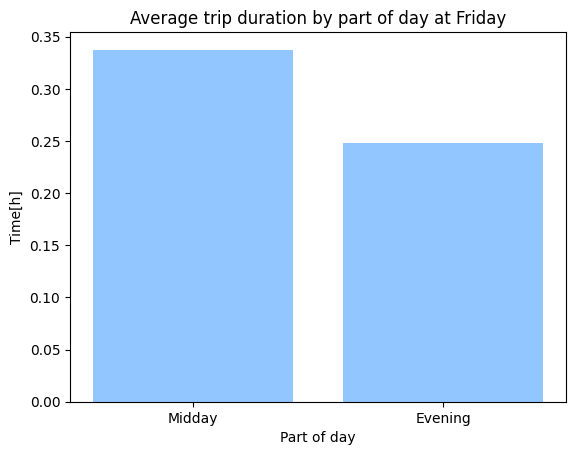

In [120]:
plt.bar(['Night', 'Morning', 'Midday', 'Evening'], avg_tripduration(df_friday)[0])
plt.xlabel('Part of day')
plt.ylabel('Time[h]')
plt.title('Average trip duration by part of day at Friday')

Text(0.5, 1.0, 'Average trip duration by part of day at Saturday')

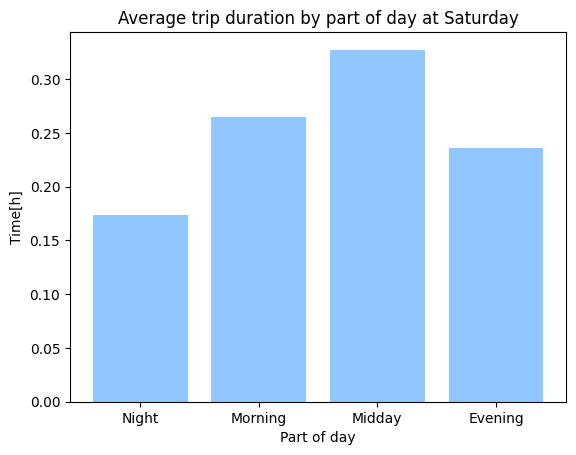

In [121]:
plt.bar(['Night', 'Morning', 'Midday', 'Evening'], avg_tripduration(df_saturday)[0])
plt.xlabel('Part of day')
plt.ylabel('Time[h]')
plt.title('Average trip duration by part of day at Saturday')

Text(0.5, 1.0, 'Average trip duration by part of day at Sunday')

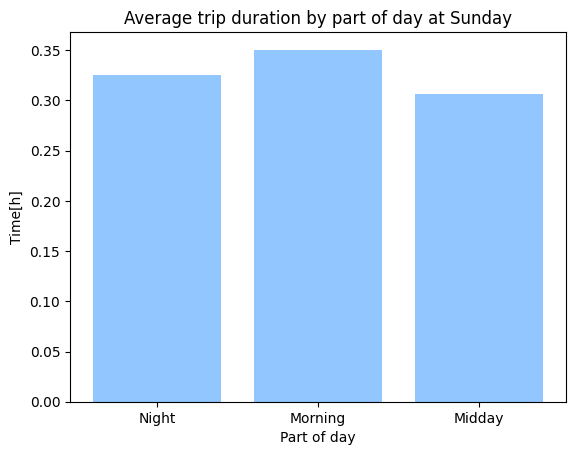

In [122]:
plt.bar(['Night', 'Morning', 'Midday', 'Evening'], avg_tripduration(df_sunday)[0])
plt.xlabel('Part of day')
plt.ylabel('Time[h]')
plt.title('Average trip duration by part of day at Sunday')

In [123]:
#I defined this function to describe a specific inference about bike usage by customer gender
def tripduration_by_gender(llst):
    men = []
    women = []
    for i in range(llst.shape[0]):
        if llst['gender'][i] == 'Male':
            men.append(llst.iloc[i]['tripduration'])
        elif llst['gender'][i] == 'Female':
            women.append(llst.iloc[i]['tripduration'])
    
    avg_men = np.average(men)
    avg_women = np.average(women)

    return [avg_men, avg_women]

Text(0.5, 1.0, 'Average trip duration by gender')

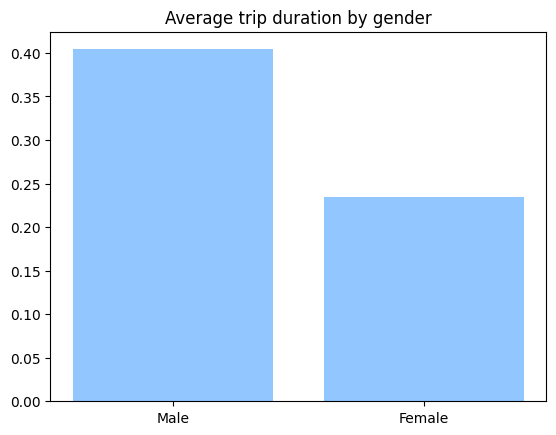

In [124]:
plt.bar(['Male', 'Female'], tripduration_by_gender(df))
plt.title("Average trip duration by gender")

In [125]:
#Last part of my analysis was a calculatinf numbers of cases when the station was the starting and ending station
#So, to calculate this was wrotten the following lines:
#Determining  necessary variables
friday_end = 0
friday_start = 0
saturday_end = 0
saturday_start = 0
sunday_end = 0
sunday_start = 0

#Starts for lopp that counts the number I need
for i in range(df.shape[0]):
    if df['start date'][i] == friday:
        if df['end station id'][i] == 388:
            friday_end += 1
        else:
            friday_start += 1
    elif df['start date'][i] == saturday:
        if df['end station id'][i] == 388:
            saturday_end += 1
        else:
            saturday_start += 1
    else:
        if df['end station id'][i] == 388:
            sunday_end += 1
        else:
            sunday_start += 1

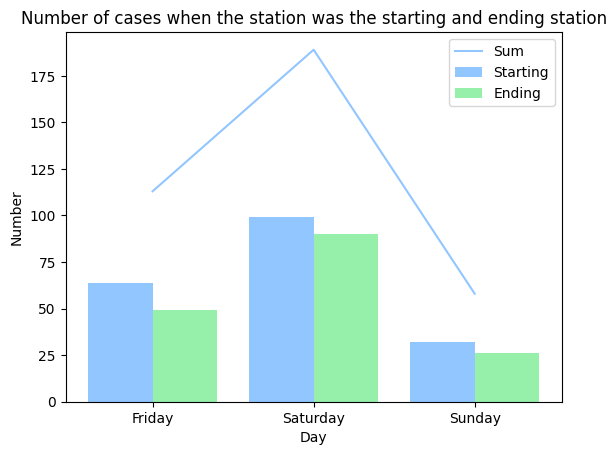

In [126]:
X = ['Friday', 'Saturday', 'Sunday']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, [friday_start, saturday_start, sunday_start], 0.4, label='Starting')
plt.bar(X_axis + 0.2, [friday_end, saturday_end, sunday_end], 0.4, label='Ending')
plt.plot([friday_start+friday_end, saturday_start+saturday_end, sunday_start+sunday_end],label='Sum')

plt.title('Number of cases when the station was the starting and ending station')
plt.xticks(X_axis, X)
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend()